<div style="
    background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
    padding: 40px;
    border-radius: 20px;
    color: #f9fafb;
    text-align: center;
    box-shadow: 0 18px 45px rgba(0,0,0,0.45);
    margin-bottom: 35px;
">

  <h1 style="
      font-size: 44px;
      font-weight: 900;
      margin: 0 0 12px 0;
      letter-spacing: 0.6px;
      text-align: center;
  ">
    🧠 Explainable Alzheimer’s Disease Prediction | ML + SHAP Explained
  </h1>

  <h3 style="
      font-size: 22px;
      font-weight: 500;
      margin: 0;
      color: #d1d5db;
  ">
    Clinical Risk Modeling with XGBoost & LightGBM
  </h3>

  <hr style="
      border: none;
      height: 1.5px;
      background: linear-gradient(to right, #93c5fd, #1f2937);
      margin: 22px auto;
      width: 70%;
  ">

  <p style="
      font-size: 18px;
      max-width: 850px;
      margin: auto;
      line-height: 1.8;
      color: #e5e7eb;
  ">
    A recall-oriented, interpretable machine learning approach for early Alzheimer’s risk prediction  
    using demographic, lifestyle, clinical, and cognitive health data.
  </p>

</div>


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     1 | Introduction
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


Alzheimer’s Disease (AD) is a progressive neurodegenerative disorder that affects memory, cognition, and daily functioning.
Early detection plays a crucial role in slowing disease progression and improving patient care.

This notebook explores a **synthetic clinical dataset** containing demographic, lifestyle, medical, cognitive, and functional information
to build **interpretable machine learning models** for predicting Alzheimer’s Disease.

🎯 **Objectives**
- Perform comprehensive exploratory data analysis (EDA)
- Engineer meaningful clinical features
- Train robust ML models (XGBoost & LightGBM)
- Prioritize recall and interpretability
- Explain predictions using SHAP values


### ⚡ TL;DR
- Goal: Early Alzheimer’s Disease Prediction
- Data: Clinical / MRI features
- Models: Random Forest, XGBoost (Explainable)
- XAI: SHAP for feature importance
- Why it matters: Medical trust & interpretability

<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     2 | Import Required Libraries
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import shap
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")


/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     3 | Load the Dataset
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>

In [2]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")

print("Shape:", df.shape)
df.head()


Shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     4 | Data Cleaning & Preparation
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


In [3]:
# Drop confidential / irrelevant columns
df.drop(columns=["DoctorInCharge"], inplace=True)

# Check missing values
df.isnull().sum().sort_values(ascending=False)


PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     4 | Exploratory Data Analysis (EDA)
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


### 5.1 Target Distribution

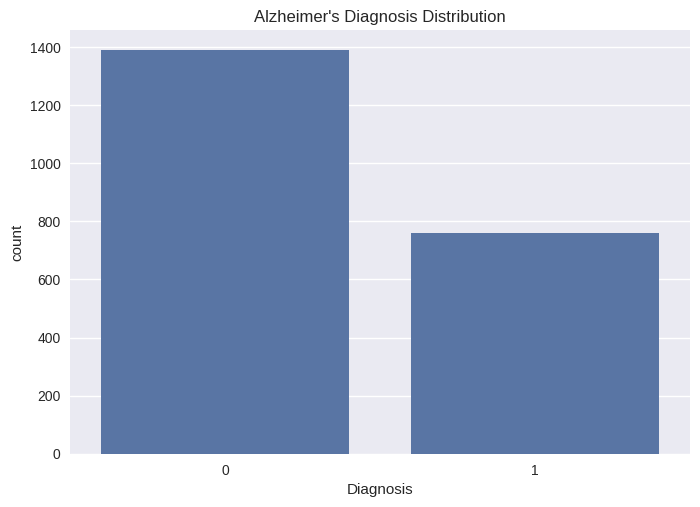

In [4]:
sns.countplot(x="Diagnosis", data=df)
plt.title("Alzheimer's Diagnosis Distribution")
plt.show()


Mild class imbalance exists, so recall will be emphasized during evaluation.

### 5.2 Age vs Diagnosis

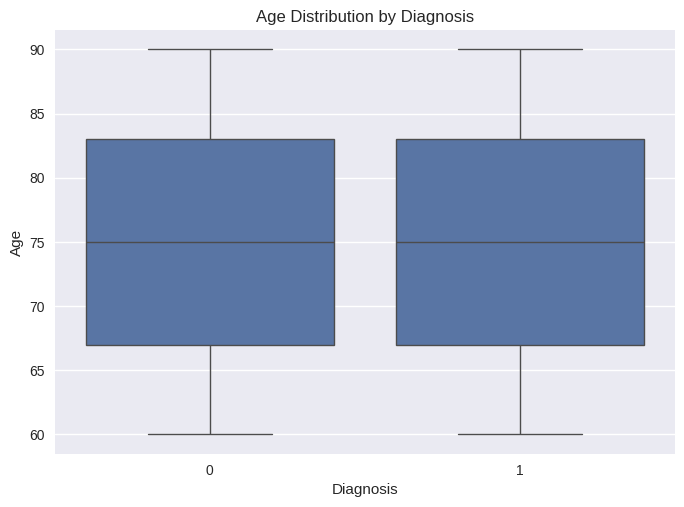

In [5]:
sns.boxplot(x="Diagnosis", y="Age", data=df)
plt.title("Age Distribution by Diagnosis")
plt.show()


## 5.3 Cognitive Scores

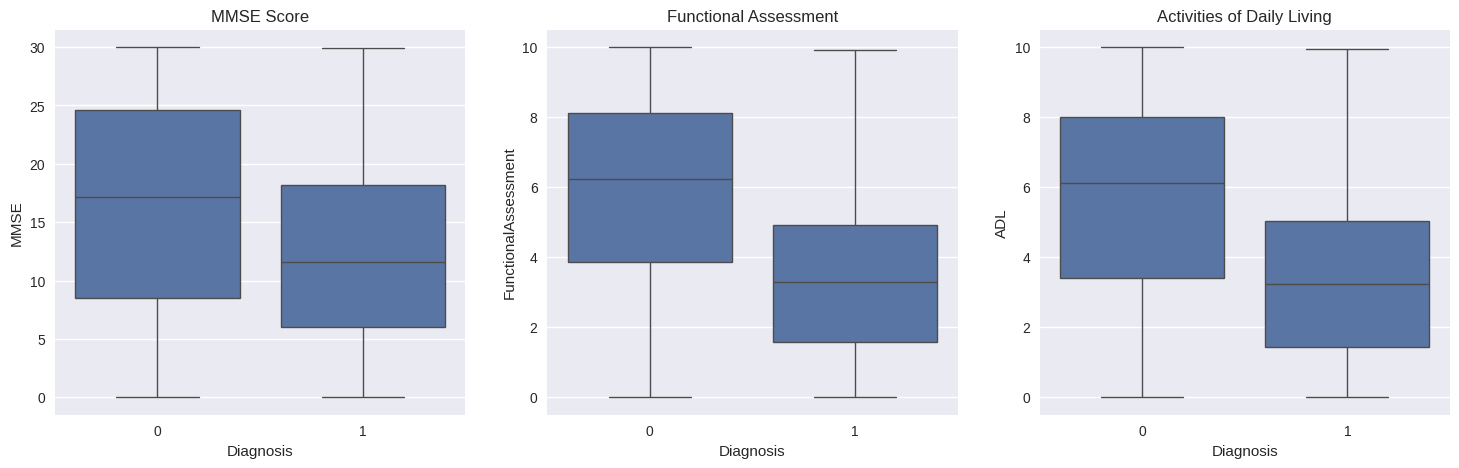

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="Diagnosis", y="MMSE", data=df, ax=axes[0])
sns.boxplot(x="Diagnosis", y="FunctionalAssessment", data=df, ax=axes[1])
sns.boxplot(x="Diagnosis", y="ADL", data=df, ax=axes[2])

axes[0].set_title("MMSE Score")
axes[1].set_title("Functional Assessment")
axes[2].set_title("Activities of Daily Living")

plt.show()


## 5.4 Correlation Heatmap

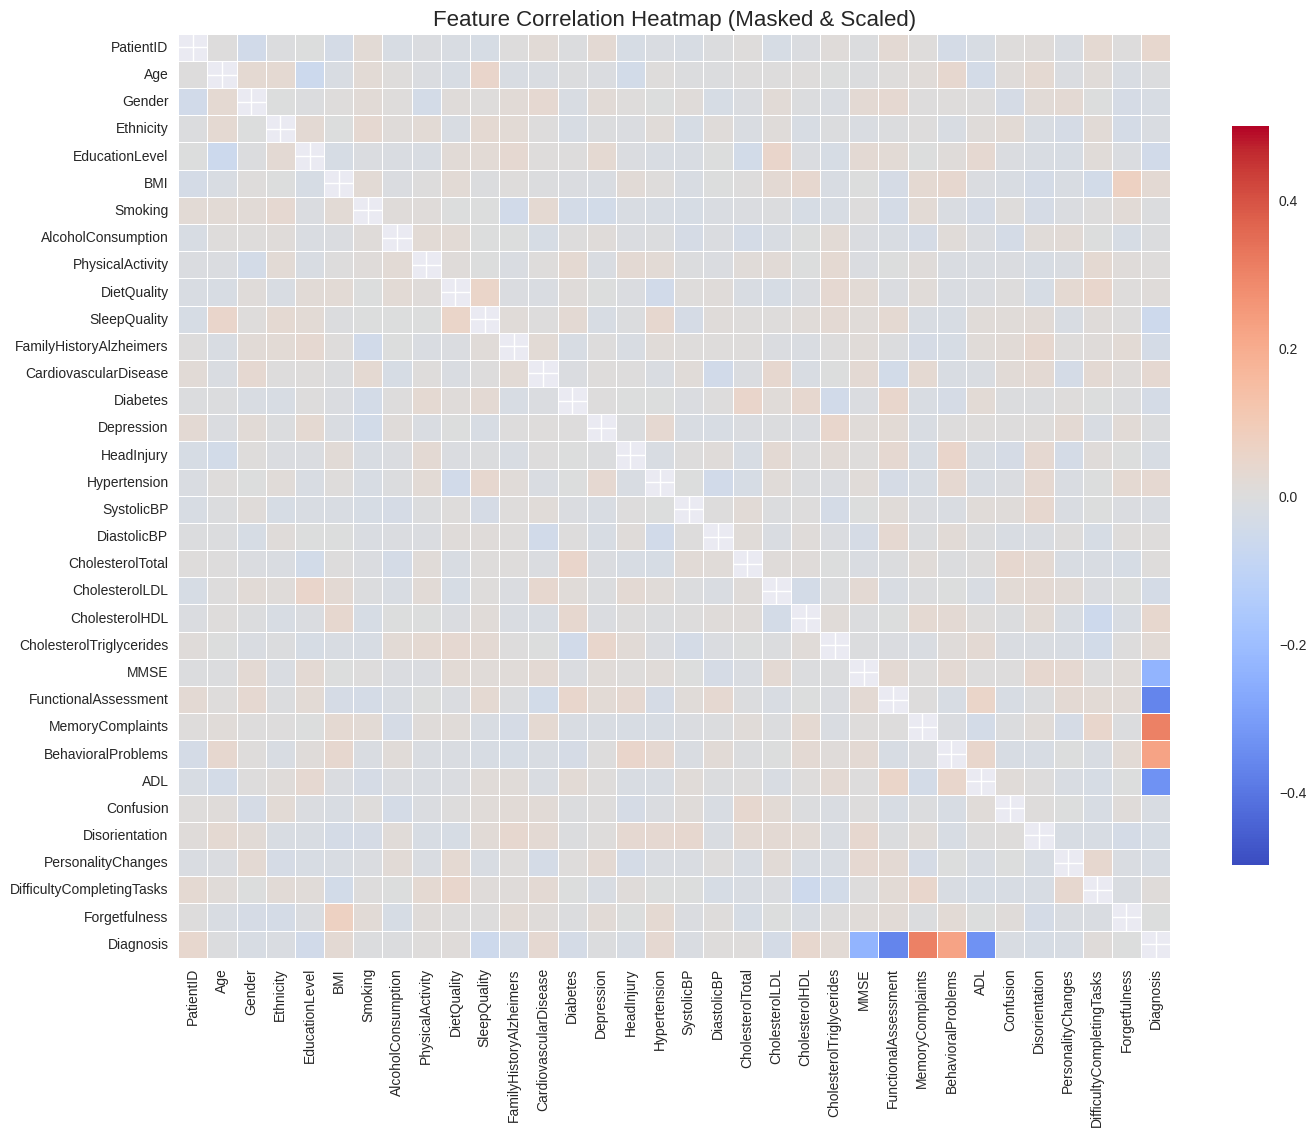

In [7]:
df_fe = df.copy()
corr = df_fe.corr()

# Mask the diagonal
mask = np.eye(corr.shape[0], dtype=bool)

plt.figure(figsize=(16,12))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    vmin=-0.5,
    vmax=0.5,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap (Masked & Scaled)", fontsize=16)
plt.show()



<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     6 | Feature Engineering
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


In [8]:
df_fe = df.copy()

# Lifestyle risk score
df_fe["LifestyleRisk"] = (
    df_fe["Smoking"] +
    (df_fe["AlcoholConsumption"] > 10).astype(int) +
    (df_fe["PhysicalActivity"] < 2).astype(int) +
    (df_fe["DietQuality"] < 5).astype(int)
)

# Cognitive impairment score
df_fe["CognitiveImpairment"] = (
    (df_fe["MMSE"] < 24).astype(int) +
    (df_fe["FunctionalAssessment"] < 5).astype(int) +
    (df_fe["ADL"] < 5).astype(int)
)

df_fe.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,LifestyleRisk,CognitiveImpairment
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,1.725883,0,0,0,1,0,0,2,2
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,2.592424,0,0,0,0,1,0,1,2
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,7.119548,0,1,0,1,0,0,2,1
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,1,6.481226,0,0,0,0,0,0,2,1
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0.014691,0,0,1,1,0,0,2,2



<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     7 | Train–Test Split
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


In [9]:
X = df_fe.drop(columns=["Diagnosis", "PatientID"])
y = df_fe["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)



<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     8 | Cross-Validation (Recall-Focused)
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


In [10]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        eval_metric="logloss", random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

for name, model in models_cv.items():
    scores = cross_val_score(
        model, X, y,
        cv=cv,
        scoring="recall"
    )
    print(f"{name}: Recall = {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression: Recall = 0.9145 ± 0.0161
XGBoost: Recall = 0.9237 ± 0.0223
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM]


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     9 | Model Training
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


### 9.1 Logistic Regression (Scaled)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

### 9.2 XGBoost Model 

In [12]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### 9.3 LightGBM Model

In [13]:
lgbm = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=400,
               random_state=42, subsample=0.8)


<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     10 | Confusion Matrix Comparison (3 Models)
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


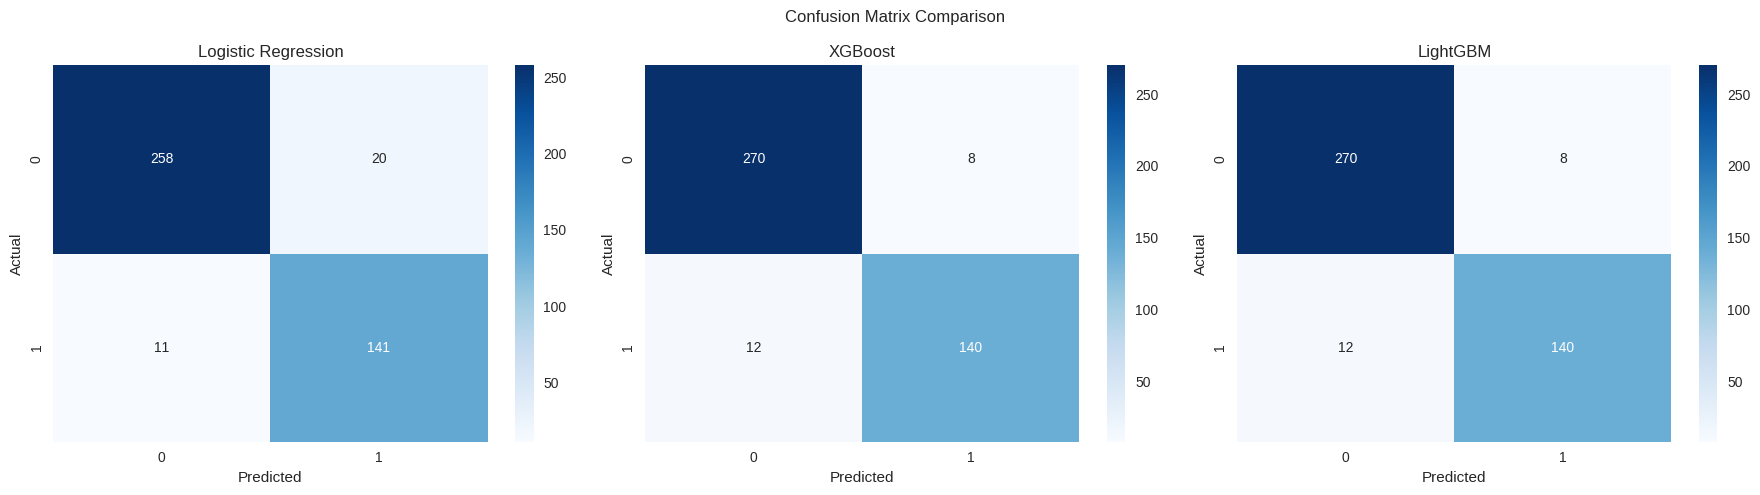

In [14]:
trained_models = {
    "Logistic Regression": (lr, X_test_scaled),
    "XGBoost": (xgb, X_test),
    "LightGBM": (lgbm, X_test)
}

fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, (name, (model, X_eval)) in zip(axes, trained_models.items()):
    y_pred = model.predict(X_eval)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle("Confusion Matrix Comparison")
plt.tight_layout()
plt.show()



<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     11 | ROC Curve Comparison
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


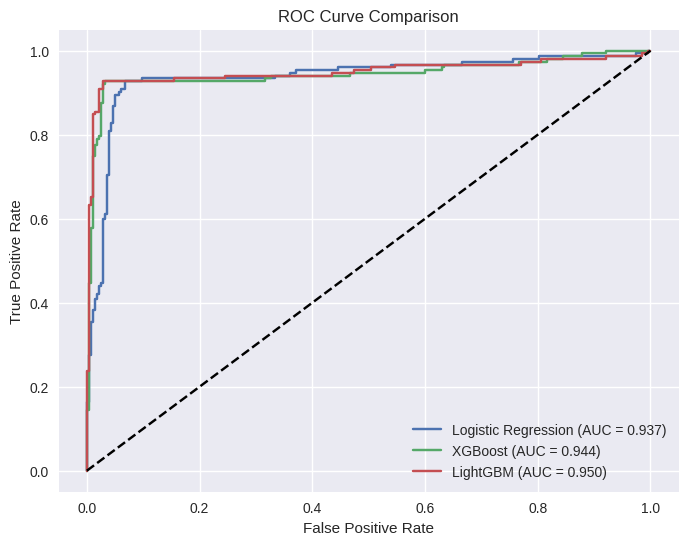

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(8,6))

for name, (model, X_eval) in trained_models.items():
    y_prob = model.predict_proba(X_eval)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()




<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     12 | Accuracy, Recall & F1 Comparison
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


In [16]:
results = []

for name, (model, X_eval) in trained_models.items():
    y_pred = model.predict(X_eval)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Recall,F1
0,Logistic Regression,0.927907,0.927632,0.900958
1,XGBoost,0.953488,0.921053,0.933333
2,LightGBM,0.953488,0.921053,0.933333


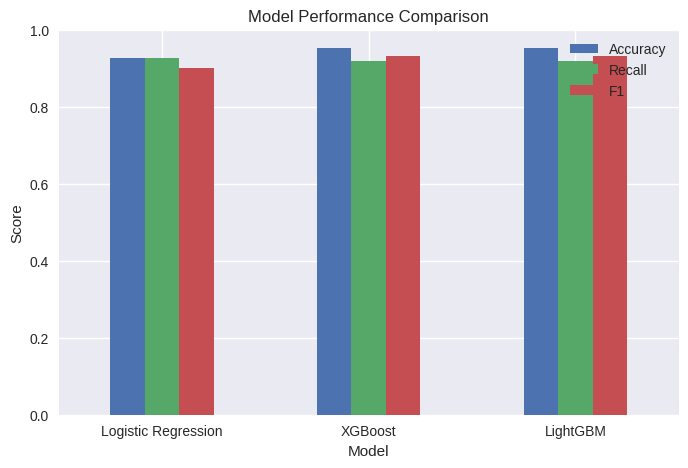

In [17]:
results_df.set_index("Model").plot(
    kind="bar", figsize=(8,5)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()




<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     13 | Explainability with SHAP (XGBoost)
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


PermutationExplainer explainer: 431it [01:03,  6.09it/s]


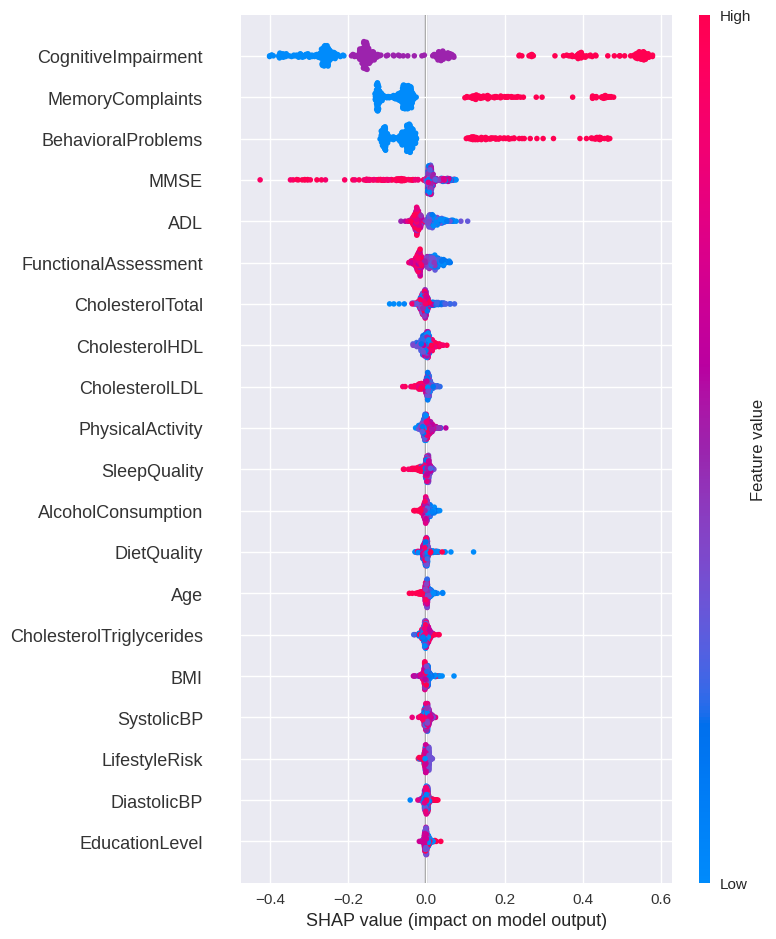

In [18]:
import shap

explainer = shap.Explainer(
    xgb.predict_proba,  
    X_train
)

shap_values = explainer(X_test)

# For binary classification: explain class 1 (Alzheimer’s risk)
shap.summary_plot(
    shap_values[:, :, 1],
    X_test,
    feature_names=X_test.columns
)


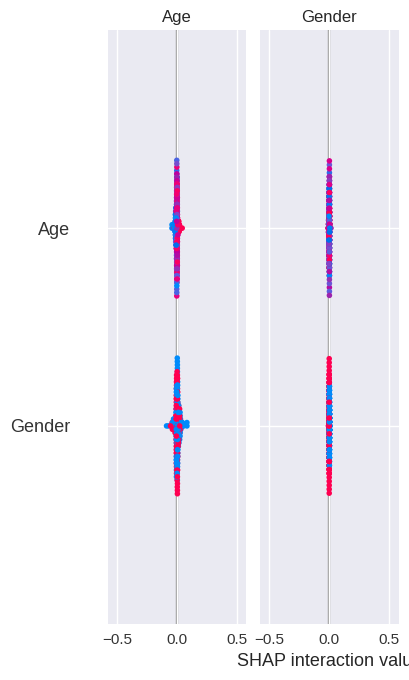

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar")




<div style="
    margin: 45px 0 22px 0;
">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size: 30px;
      font-weight: 800;
      color: #93c5fd;
      margin: 0;
      letter-spacing: 0.6px;
  ">
     14 | Conclusion
  </h2>

  <hr style="
      border: none;
      height: 2px;
      width: 100%;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top: 14px;
  ">
</div>


This notebook explored Alzheimer’s Disease prediction using structured clinical
and lifestyle data with an emphasis on **recall and interpretability**.
While Logistic Regression offered strong baseline performance, ensemble models
(**XGBoost** and **LightGBM**) achieved the best overall results, with higher
accuracy and improved F1-scores.

The findings highlight the effectiveness of tree-based models in capturing
complex clinical patterns, while SHAP analysis confirms that cognitive and
functional assessment features are the most influential predictors.
Although the dataset is synthetic, the workflow presented here reflects
best practices for medical risk modeling and explainable machine learning.


If this notebook helped you learn something new or saved you time,  
**please don’t forget to ⬆️ UPVOTE!**